
# Project: Analyzing No-Show Appointments Among Patients in Brazil 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


> This dataset collects information from >100k medical appointments in Brazil during May 2016 and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

> ### Variables:
> 1. **Independent:** 
>> <a href='#show'>Showing up for the appointment.</a>
> 2. **Dependent:** 
>> * <a href='#gender'>Gender.</a>
>> * <a href='#location'>Location of the hospital.</a>
>> * <a href='#enroll'>Enrollment in the welfare program.</a>
>> * <a href='#sms'>SMS Confirmation.</a>
>> * <a href='#age'>Age</a>

> ### Question:
>> Which factors have an effect on and can help predict whether the patient shows up for the appointment?


In [1]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# functions
def bar(x,y,title):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title);

<a id='wrangling'></a>
## Data Wrangling


In [3]:
# Loading the data 
df = pd.read_csv('NSA_05_2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

### Renaming columns for consistency and ease of access:

In [5]:
df.rename(columns=lambda x: x.lower(),inplace=True)
df.rename(columns={'no-show':'no_show'}, inplace=True)
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   patientid       110527 non-null  float64
 1   appointmentid   110527 non-null  int64  
 2   gender          110527 non-null  object 
 3   scheduledday    110527 non-null  object 
 4   appointmentday  110527 non-null  object 
 5   age             110527 non-null  int64  
 6   neighbourhood   110527 non-null  object 
 7   scholarship     110527 non-null  int64  
 8   hipertension    110527 non-null  int64  
 9   diabetes        110527 non-null  int64  
 10  alcoholism      110527 non-null  int64  
 11  handcap         110527 non-null  int64  
 12  sms_received    110527 non-null  int64  
 13  no_show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Minimum age is -1 which is not logical.

### Dropping the illogical age:

In [8]:
df.query('age < 0')

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [9]:
df.drop(99832,inplace=True)
df

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [10]:
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Checking for NaN values

In [11]:
df.isna().sum().any()

False

### Dropping unnecessary columns:

In [12]:
df.drop(['patientid','appointmentid','appointmentday','scheduledday','hipertension','diabetes','alcoholism','handcap'],axis=1,inplace=True)
df.head(1)

,gender,age,neighbourhood,scholarship,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,0,No


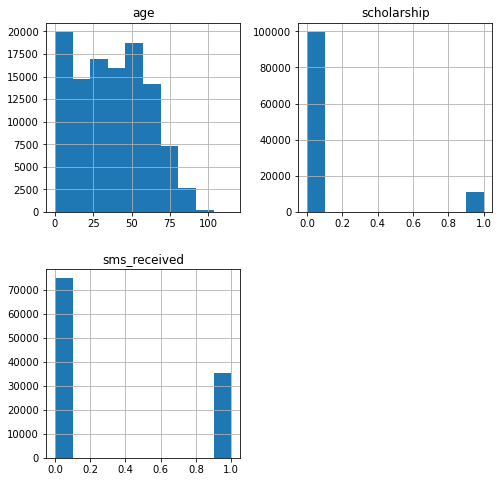

In [13]:
df.hist(figsize=(8,8));

<a id='eda'></a>
## Exploratory Data Analysis
>Each variable will be analyzed separately (1D variable analysis), then dependent variables will be analyzed against the independent variable (2D variable analysis) to determine the association between them. 

### Independent Variable:

<a id='show'></a>
### Showing up for the appointment:

In [14]:
showed = df.no_show == 'No'
missed = df.no_show == 'Yes'

In [15]:
df.no_show.value_counts()

No     88207
Yes    22319
Name: no_show, dtype: int64

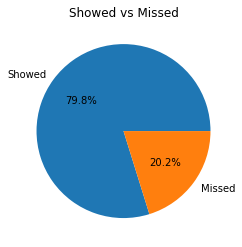

In [16]:
plt.pie(df.no_show.value_counts(), labels=['Showed', 'Missed'], autopct='%1.1f%%')
plt.title('Showed vs Missed');

79.8% of the sample showed for their appointments while 20.2% missed them.

### Dependent Variables:

<a id='gender'></a>
### 1) Gender:

In [17]:
#calculating females proportion
total_num = df.gender.count()
num_f = df.gender[df.gender=='F'].count()
prop_f = num_f/total_num
prop_f

#calculating males proportion
num_m = df.gender[df.gender=='M'].count()
prop_m = num_m/total_num
prop_m

0.3500262381702043

In [18]:
df.gender.value_counts()

F    71839
M    38687
Name: gender, dtype: int64

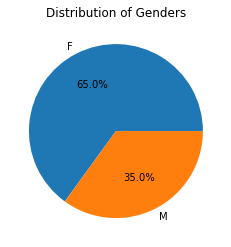

In [19]:
plt.pie(df.gender.value_counts(), labels=['F','M'],autopct='%1.1f%%')
plt.title('Distribution of Genders');

Percentage of Females in the sample = 65%

Percentage of Males in the sample = 35%

In [20]:
df.query('gender == "F"')['no_show'].value_counts()

No     57245
Yes    14594
Name: no_show, dtype: int64

No     57245
Yes    14594
Name: no_show, dtype: int64

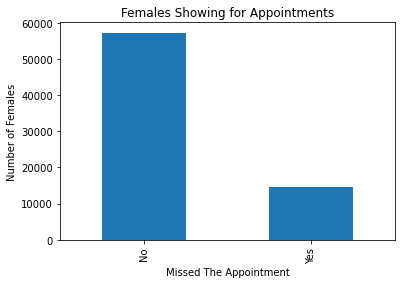

In [21]:
# Females Showing for Appointments
df.query('gender == "F"')['no_show'].value_counts().plot(kind='bar')
bar('Missed The Appointment','Number of Females','Females Showing for Appointments')
df.query('gender == "F"')['no_show'].value_counts()

In [22]:
df.query('gender == "M"')['no_show'].value_counts()

No     30962
Yes     7725
Name: no_show, dtype: int64

No     30962
Yes     7725
Name: no_show, dtype: int64

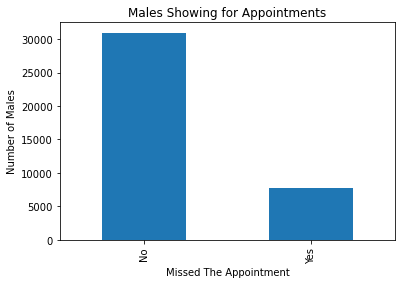

In [23]:
# Males Showing for Appointments
df.query('gender == "M"')['no_show'].value_counts().plot(kind='bar')
bar('Missed The Appointment', 'Number of Males', 'Males Showing for Appointments')
df.query('gender == "M"')['no_show'].value_counts()

Males proprotion =  0.8003205211052808
Females proprotion =  0.7968512924734475


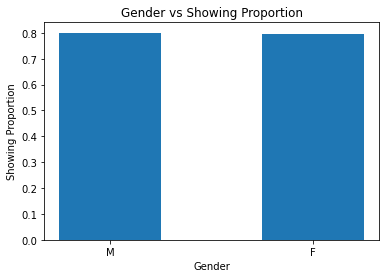

In [24]:
# Males vs Females Showing for Appointments
males = df.query('gender == "M"')
mshow = df.query('gender == "M"')['no_show'].value_counts()[0]
mtotal = df.query('gender == "M"')['no_show'].count()
mprop = mshow/mtotal
print('Males proprotion = ',mprop)
fshow = df.query('gender == "F"')['no_show'].value_counts()[0]
ftotal = df.query('gender == "F"')['no_show'].count()
fprop = fshow/ftotal
print('Females proprotion = ',fprop)
mb = plt.bar(['M','F'], [mprop,fprop], width=0.5)
bar('Gender', 'Showing Proportion', 'Gender vs Showing Proportion')

80% of males showed for their appointments.

79.7% of females showed for their appointments.

Males proprotion =  0.19967947889471915
Females proprotion =  0.20314870752655242


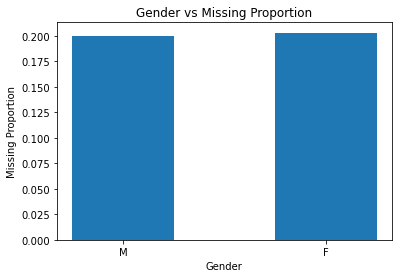

In [25]:
# Males vs Females Missing Appointments
males = df.query('gender == "M"')
mshow = df.query('gender == "M"')['no_show'].value_counts()[1]
mtotal = df.query('gender == "M"')['no_show'].count()
mprop = mshow/mtotal
print('Males proprotion = ',mprop)
fshow = df.query('gender == "F"')['no_show'].value_counts()[1]
ftotal = df.query('gender == "F"')['no_show'].count()
fprop = fshow/ftotal
print('Females proprotion = ',fprop)
mb = plt.bar(['M','F'], [mprop,fprop], width=0.5)
#fb = plt.bar(['s','m'], fshow,width=0.5, label='Females')
bar('Gender', 'Missing Proportion', 'Gender vs Missing Proportion')

20% of males showed for their appointments.

20.3% of females showed for their appointments.

### Statistical Test: (Chi-Square)
Chi-Square test was performed using an <a href='https://www.socscistatistics.com/tests/chisquare2/default2.aspx'>online calculator</a> at CI of 95%


The chi-square statistic is 1.88

The p-value is .17

The result is **not significant** at p < .05.

<a id='location'></a>
### 2) Location of the Hospital:

In [26]:
df['neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: neighbourhood, Length: 81, dtype: int64

In [27]:
df['neighbourhood'].nunique()

81

In [28]:
df['neighbourhood'].value_counts().describe()

count      81.000000
mean     1364.518519
std      1369.191779
min         1.000000
25%       413.000000
50%       851.000000
75%      2018.000000
max      7717.000000
Name: neighbourhood, dtype: float64

There are **81** different hospital locations.

Mean number of appointments in different locations is 1364.52 with min of 1 and max of 7717.

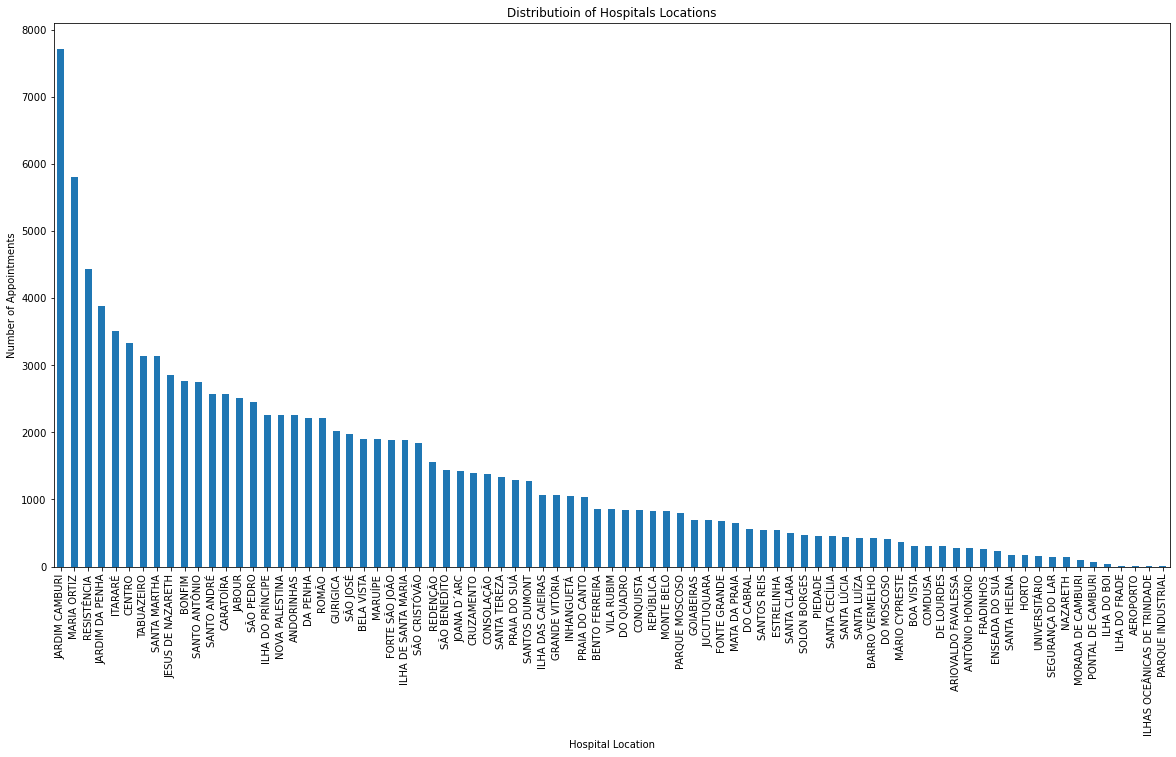

In [29]:
# visualisation of different hospitals locations
df['neighbourhood'].value_counts().plot(kind='bar',figsize=(20,10))
bar('Hospital Location', 'Number of Appointments', 'Distributioin of Hospitals Locations')

In [30]:
counts = df['neighbourhood'].value_counts()
counts.idxmax(), counts.max()

('JARDIM CAMBURI', 7717)

Neighbourhood with the **most** appointments is **JARDIM CAMBURI** with **7717** appointments.

In [31]:
counts.idxmin(), counts.min()

('PARQUE INDUSTRIAL', 1)

Neighbourhood with the **least** appointments is **PARQUE INDUSTRIAL** with **1** appointment.

In [32]:
gp = df.groupby(['neighbourhood'])['no_show'].value_counts()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(gp)

neighbourhood                no_show
AEROPORTO                    No            7
                             Yes           1
ANDORINHAS                   No         1741
                             Yes         521
ANTÔNIO HONÓRIO              No          221
                             Yes          50
ARIOVALDO FAVALESSA          No          220
                             Yes          62
BARRO VERMELHO               No          332
                             Yes          91
BELA VISTA                   No         1523
                             Yes         384
BENTO FERREIRA               No          665
                             Yes         193
BOA VISTA                    No          254
                             Yes          58
BONFIM                       No         2223
                             Yes         550
CARATOÍRA                    No         1974
                             Yes         591
CENTRO                       No         2631
                  

In [33]:
# number of appointments in different locations
area_counts = df.groupby(['neighbourhood']).count()['age']
area_counts

neighbourhood
AEROPORTO                 8
ANDORINHAS             2262
ANTÔNIO HONÓRIO         271
ARIOVALDO FAVALESSA     282
BARRO VERMELHO          423
                       ... 
SÃO JOSÉ               1977
SÃO PEDRO              2448
TABUAZEIRO             3132
UNIVERSITÁRIO           152
VILA RUBIM              851
Name: age, Length: 81, dtype: int64

In [34]:
# getting areas counts
y_list = []
n_list = []
total = []
for area in area_counts.index:
    total.append(area_counts[area])
    if (area != 'ILHAS OCEÂNICAS DE TRINDADE') and (area != 'PARQUE INDUSTRIAL'):
        y_list.append(gp[area]['Yes'])
        n_list.append(gp[area]['No'])
    elif area == 'PARQUE INDUSTRIAL':
        y_list.append(0)
        n_list.append(gp[area]['No'])
    elif area == 'ILHAS OCEÂNICAS DE TRINDADE':
        y_list.append(gp[area]['Yes'])
        n_list.append(0)

In [35]:
# creating a df to hold the areas data
areas_df = pd.DataFrame()
areas_df['area'] = area_counts.index
areas_df['total'] = total
areas_df['showed'] = n_list
areas_df['missed'] = y_list
areas_df['show_prop'] = areas_df['showed']/areas_df['total']
areas_df['miss_prop'] = areas_df['missed']/areas_df['total']
areas_df

,area,total,showed,missed,show_prop,miss_prop
0,AEROPORTO,8,7,1,0.875000,0.125000
1,ANDORINHAS,2262,1741,521,0.769673,0.230327
2,ANTÔNIO HONÓRIO,271,221,50,0.815498,0.184502
3,ARIOVALDO FAVALESSA,282,220,62,0.780142,0.219858
4,BARRO VERMELHO,423,332,91,0.784870,0.215130
...,...,...,...,...,...,...
76,SÃO JOSÉ,1977,1549,428,0.783510,0.216490
77,SÃO PEDRO,2448,1933,515,0.789624,0.210376
78,TABUAZEIRO,3132,2559,573,0.817050,0.182950
79,UNIVERSITÁRIO,152,120,32,0.789474,0.210526


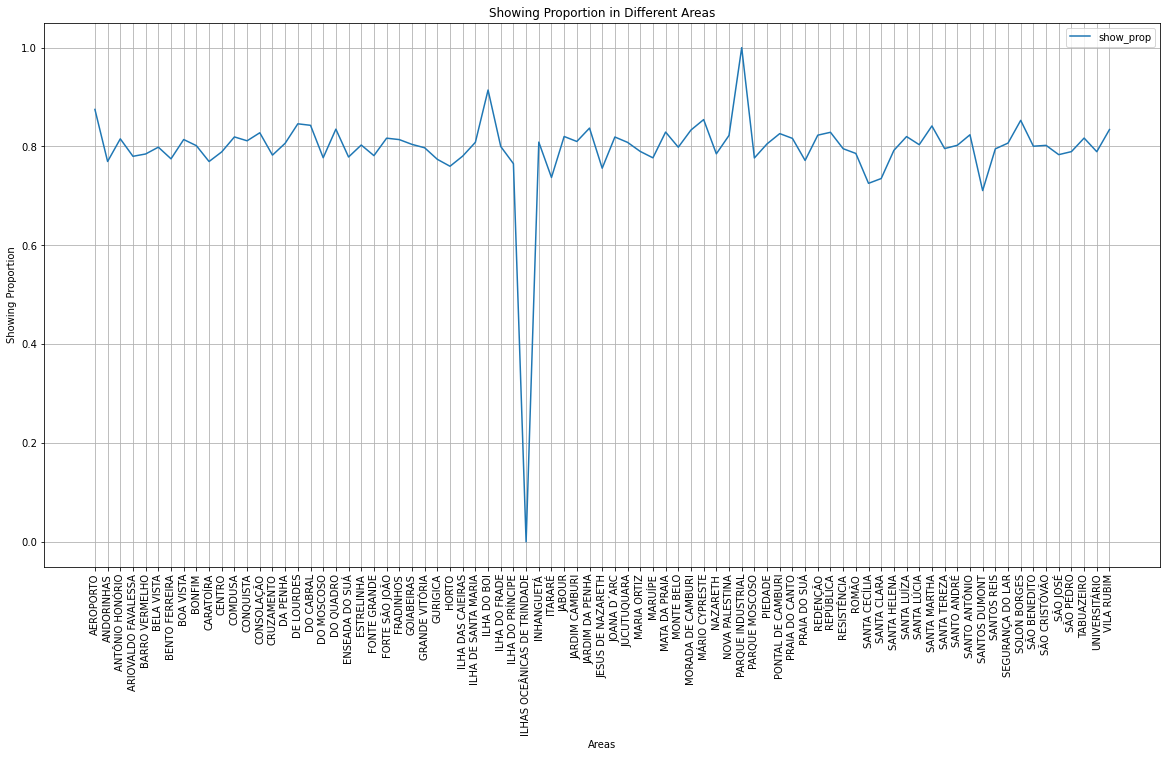

In [36]:
# Visualisation of Showing Proportion in Different Areas
areas_df.plot(x='area', y='show_prop', figsize=(20,10),grid=bool)
plt.title('Showing Proportion in Different Areas')
plt.xlabel('Areas')
plt.xticks(range(0,len(list(areas_df['area']))),list(areas_df['area']),rotation='vertical')
plt.ylabel('Showing Proportion');

In [37]:
areas_df.area[areas_df.show_prop.idxmax()], areas_df.show_prop.max()

('PARQUE INDUSTRIAL', 1.0)

Area with the highest **show** proportion is **PARQUE INDUSTRIAL (1.0)**

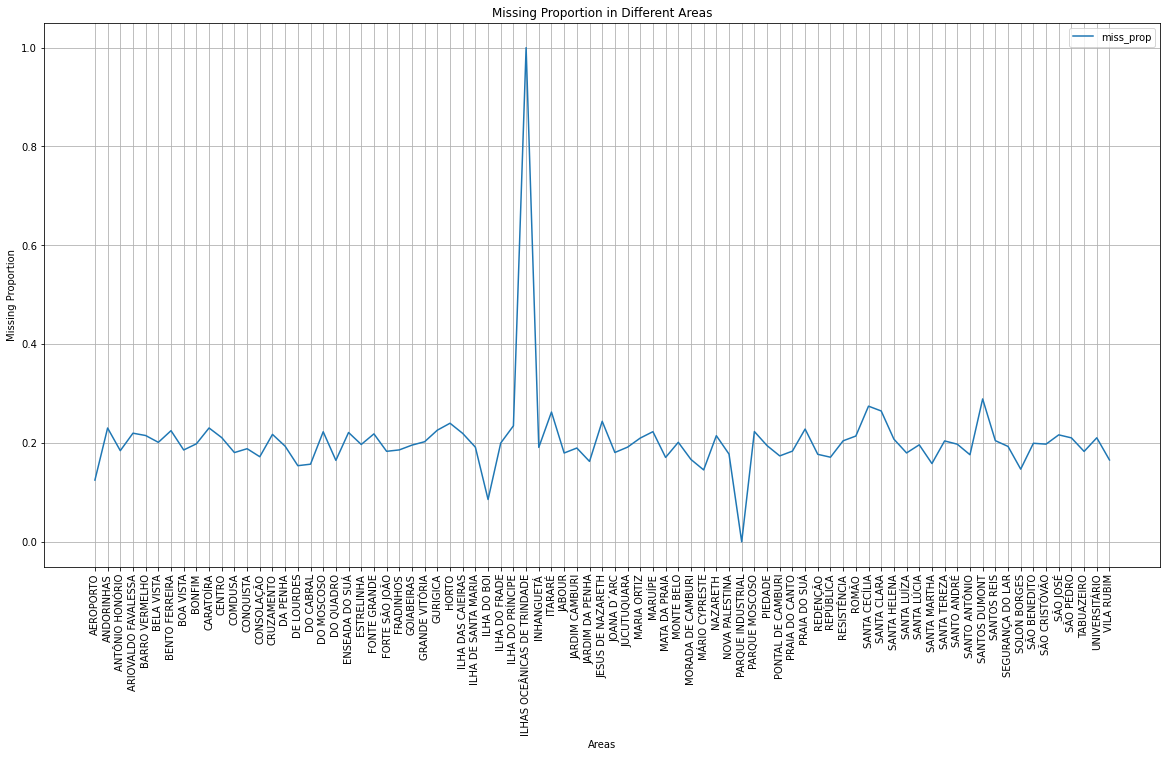

In [38]:
# Visualisation of Missing Proportion in Different Areas
areas_df.plot(x='area', y='miss_prop', figsize=(20,10),grid=bool)
plt.title('Missing Proportion in Different Areas')
plt.xlabel('Areas')
plt.xticks(range(0,len(list(areas_df['area']))),list(areas_df['area']),rotation='vertical')
plt.ylabel('Missing Proportion');

In [39]:
areas_df.area[areas_df.miss_prop.idxmax()], areas_df.miss_prop.max()

('ILHAS OCEÂNICAS DE TRINDADE', 1.0)

Area with the highest **miss** proportion is **ILHAS OCEÂNICAS DE TRINDADE (1.0)**

<a id='enroll'></a>
### 3) Enrollment in Welfare Program:

In [40]:
df.scholarship.value_counts()

0    99665
1    10861
Name: scholarship, dtype: int64

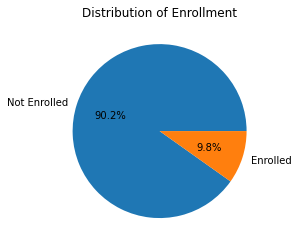

In [41]:
plt.pie(df.scholarship.value_counts(),labels=['Not Enrolled', 'Enrolled'],autopct='%1.1f%%')
plt.title('Distribution of Enrollment');

9.8% of patients are enrolled in the welfare program.

90.2% of patients are not enrolled in the welfare program.

In [42]:
sc = df.groupby(['scholarship'])['no_show'].value_counts()
sc

scholarship  no_show
0            No         79924
             Yes        19741
1            No          8283
             Yes         2578
Name: no_show, dtype: int64

In [43]:
enrolled = df.scholarship == 1
not_enrolled = df.scholarship == 0

In [44]:
# creating a df to hold the scholarship data
sc_df = pd.DataFrame(index=['Yes','No'])
sc_df['total'] = [10861, 99665]
sc_df['show'] = [sc[1]['No'], sc[0]['No']]
sc_df['miss'] = [sc[1]['Yes'], sc[0]['Yes']]
sc_df['show_prop'] = sc_df['show']/sc_df['total']
sc_df['miss_prop'] = sc_df['miss']/sc_df['total']
sc_df

,total,show,miss,show_prop,miss_prop
Yes,10861,8283,2578,0.762637,0.237363
No,99665,79924,19741,0.801926,0.198074


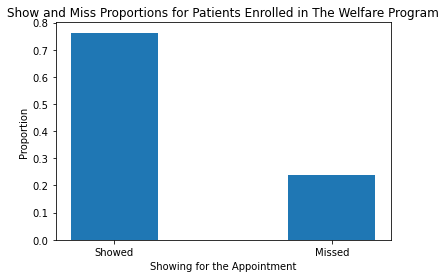

In [45]:
# analyzing data for enrolled patients
plt.bar([1,2],[sc_df['show_prop']['Yes'],sc_df['miss_prop']['Yes']],tick_label=['Showed','Missed'], width=0.4)
bar('Showing for the Appointment', 'Proportion', 'Show and Miss Proportions for Patients Enrolled in The Welfare Program')

76% of **enrolled** patients show for their appointments.

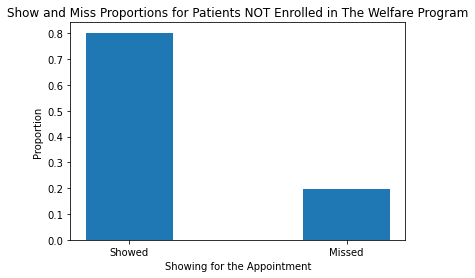

In [46]:
# analyzing data for non enrolled patients
plt.bar([1,2],[sc_df['show_prop']['No'],sc_df['miss_prop']['No']],tick_label=['Showed','Missed'], width=0.4)
bar('Showing for the Appointment', 'Proportion', 'Show and Miss Proportions for Patients NOT Enrolled in The Welfare Program')

80% of **non enrolled** patients show for their appointments.

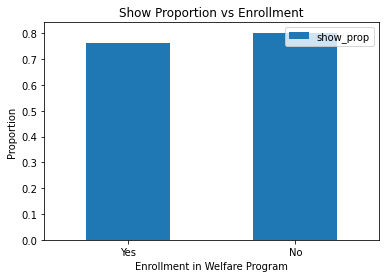

In [47]:
# analyzing show proportions across the two groups
sc_df.plot(y='show_prop',kind='bar')
plt.xticks(rotation='horizontal')
bar('Enrollment in Welfare Program', 'Proportion', 'Show Proportion vs Enrollment')

Non Enrolled patients (80%) show for their appointments slightly more than Enrolled patients (76%)

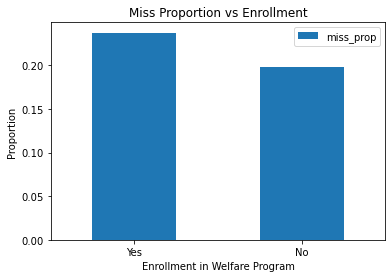

In [48]:
# analyzing miss proportions across the two groups
sc_df.plot(y='miss_prop',kind='bar')
plt.xticks(rotation='horizontal')
bar('Enrollment in Welfare Program', 'Proportion', 'Miss Proportion vs Enrollment')

Enrolled patients (24%) miss their appointments slightly more than Non Enrolled patients (20%)

### Statistical Test: (Chi-Square)
Chi-Square test was performed using an <a href='https://www.socscistatistics.com/tests/chisquare2/default2.aspx'>online calculator</a> at CI of 95%


The chi-square statistic is 93.81

The p-value is < .00001

The result is **significant** at p < .05

<a id='sms'></a>
### 4) SMS Confirmation:

In [49]:
df.sms_received.value_counts()[0]

75044

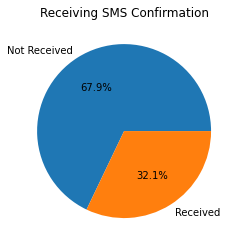

In [50]:
plt.pie(df.sms_received.value_counts(),labels=['Not Received', 'Received'],autopct='%1.1f%%')
plt.title('Receiving SMS Confirmation');

32.1% of the patients received SMS confirmation.

67.9% of the patients did not receive SMS confirmation.

In [51]:
sms = df.groupby(['sms_received'])['no_show'].value_counts()
sms

sms_received  no_show
0             No         62509
              Yes        12535
1             No         25698
              Yes         9784
Name: no_show, dtype: int64

In [52]:
# creating a df to hold the sms data
sms_df = pd.DataFrame(index=['Yes','No'])
sms_df['total'] = [df.sms_received.value_counts()[1], df.sms_received.value_counts()[0]]
sms_df['show'] = [sms[1]['No'], sms[0]['No']]
sms_df['miss'] = [sms[1]['Yes'], sms[0]['Yes']]
sms_df['show_prop'] = sms_df['show']/sms_df['total']
sms_df['miss_prop'] = sms_df['miss']/sms_df['total']
sms_df

,total,show,miss,show_prop,miss_prop
Yes,35482,25698,9784,0.724255,0.275745
No,75044,62509,12535,0.832965,0.167035


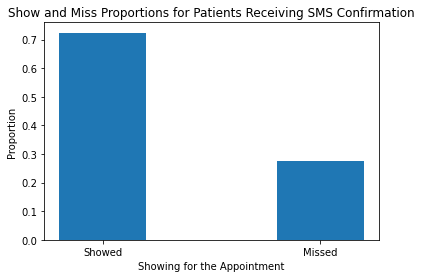

In [53]:
# analyzing data for received
plt.bar([1,2],[sms_df['show_prop']['Yes'],sms_df['miss_prop']['Yes']],tick_label=['Showed','Missed'], width=0.4)
bar('Showing for the Appointment', 'Proportion', 'Show and Miss Proportions for Patients Receiving SMS Confirmation')

72% of the patients who received SMS confirmation showed for their appointment.

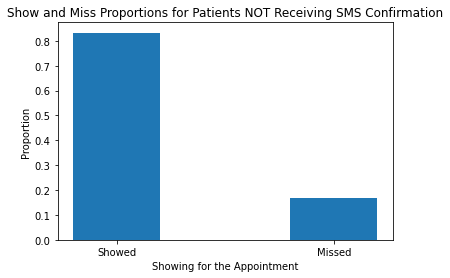

In [54]:
# analyzing data for not received
plt.bar([1,2],[sms_df['show_prop']['No'],sms_df['miss_prop']['No']],tick_label=['Showed','Missed'], width=0.4)
bar('Showing for the Appointment', 'Proportion', 'Show and Miss Proportions for Patients NOT Receiving SMS Confirmation')

83% of the patients who did not receive SMS confirmation showed for their appointment.

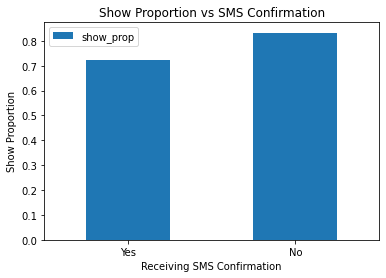

In [55]:
# analyzing show proportions across the two groups
sms_df.plot(y='show_prop',kind='bar')
plt.xticks(rotation='horizontal')
bar('Receiving SMS Confirmation', 'Show Proportion', 'Show Proportion vs SMS Confirmation')

patients who did not receive SMS confirmation (83%) showed for their appointments more than those who did (72%)

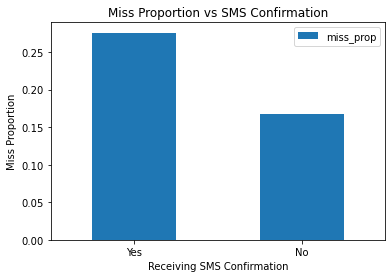

In [56]:
# analyzing miss proportions across the two groups
sms_df.plot(y='miss_prop',kind='bar')
plt.xticks(rotation='horizontal')
bar('Receiving SMS Confirmation', 'Miss Proportion', 'Miss Proportion vs SMS Confirmation')

patients who received SMS confirmation (26%) missed their appointment more than those who did not (17%)

### Statistical Test: (Chi-Square)
Chi-Square test was performed using an <a href='https://www.socscistatistics.com/tests/chisquare2/default2.aspx'>online calculator</a> at CI of 95%


The chi-square statistic is 1766.65

The p-value is < .00001

The result is **significant** at p < .05

<a id='age'></a>
### Age:

In [57]:
df.age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

Mean age is 37, with a max of 115 and min of 0.

In [58]:
df.age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: age, Length: 103, dtype: int64

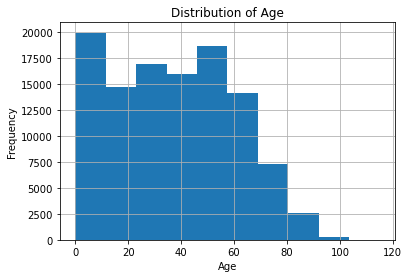

In [59]:
df.age.hist()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age');

Age distribution is slightly **right skewed**.

### Dividing the sample into age groups:

### Newborns: (aged < 1)

In [60]:
nb_total = df.query('age < 1')['no_show'].value_counts().sum()
nb_show = df.query('age < 1')['no_show'].value_counts()['No']
nb_miss = df.query('age < 1')['no_show'].value_counts()['Yes']
nb_show_prop = nb_show/nb_total
nb_miss_prop = nb_miss/nb_total
nb_show, nb_miss, nb_total

(2900, 639, 3539)

### Children: (aged 1-12)

In [61]:
ch_total = df.query('1 <= age < 13')['no_show'].value_counts().sum()
ch_show = df.query('1 <= age < 13')['no_show'].value_counts()['No']
ch_miss = df.query('1 <= age < 13')['no_show'].value_counts()['Yes']
ch_show_prop = ch_show/ch_total
ch_miss_prop = ch_miss/ch_total
ch_show, ch_miss, ch_total

(13829, 3668, 17497)

### Teenagers: (aged 13-18)

In [62]:
teen_total = df.query('13 <= age <= 18')['no_show'].value_counts().sum()
teen_show = df.query('13 <= age <= 18')['no_show'].value_counts()['No']
teen_miss = df.query('13 <= age <= 18')['no_show'].value_counts()['Yes']
teen_show_prop = teen_show/teen_total
teen_miss_prop = teen_miss/teen_total
teen_show, teen_miss, teen_total

(5790, 2040, 7830)

### Adults: (aged 19-60)

In [63]:
adl_total = df.query('18 < age <= 60')['no_show'].value_counts().sum()
adl_show = df.query('18 < age <= 60')['no_show'].value_counts()['No']
adl_miss = df.query('18 < age <= 60')['no_show'].value_counts()['Yes']
adl_show_prop = adl_show/adl_total
adl_miss_prop = adl_miss/adl_total
adl_show, adl_miss, adl_total

(48932, 12966, 61898)

### Elderly: (aged > 60)

In [64]:
eld_total = df.query('age > 60')['no_show'].value_counts().sum()
eld_show = df.query('age > 60')['no_show'].value_counts()['No']
eld_miss = df.query('age > 60')['no_show'].value_counts()['Yes']
eld_show_prop = eld_show/eld_total
eld_miss_prop = eld_miss/eld_total
eld_show, eld_miss, eld_total

(16756, 3006, 19762)

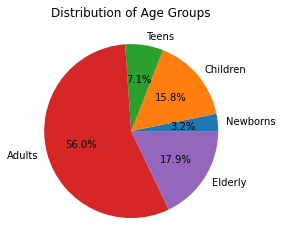

In [65]:
plt.pie([nb_total,ch_total,teen_total,adl_total,eld_total], labels=['Newborns', 'Children', 'Teens', 'Adults', 'Elderly'], autopct='%1.1f%%')
plt.title('Distribution of Age Groups');

The majority of the sample are adults (56%) followed by eldelrly (17.9%), children (15.8%), teens (7.1%), and newborns (3.2%).

### Mean ages for showing and missing:

In [66]:
df.age[showed].describe()

count    88207.000000
mean        37.790504
std         23.338645
min          0.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: age, dtype: float64

Mean age for patients who **showed** for their appointments is 37.8

In [67]:
df.age[missed].describe()

count    22319.000000
mean        34.317667
std         21.965941
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: age, dtype: float64

Mean age for patients who **missed** their appointments is 34.3

### Statistical Test: (Welch's T-test)
Wilch's T-test was performed using an <a href='https://www.statskingdom.com/150MeanT2uneq.html'>online calculator</a> at CI of 95%

The T-test statistic is -20.83

The p-value is < .00001

The result is **significant** at p < .05

### Show and Miss props for different age groups:

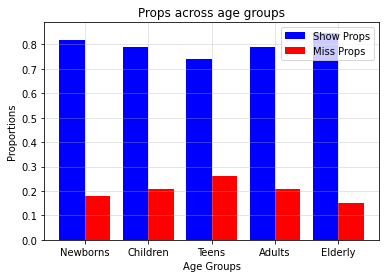

In [68]:
ind = np.arange(5)
w = 0.4
show_props = [nb_show_prop, ch_show_prop, teen_show_prop, adl_show_prop, eld_show_prop]
miss_props = [nb_miss_prop, ch_miss_prop, teen_miss_prop, adl_miss_prop, eld_miss_prop]
show_bars = plt.bar(ind, show_props, w, color='b', label='Show Props')
miss_bars = plt.bar(ind+w, miss_props, w, color='r', label='Miss Props')
bar('Age Groups', 'Proportions', 'Props across age groups')
locations = ind + w / 2  
labels = ['Newborns', 'Children', 'Teens', 'Adults', 'Elderly']
plt.xticks(locations, labels)
plt.grid(alpha= .4)
plt.legend();

Miss proportions for the different age groups are **normally distributed**. (red bars)

### Statistical Test: (Chi-Square)
Chi-Square test was performed using an <a href='https://www.socscistatistics.com/tests/chisquare2/default2.aspx'>online calculator</a> at CI of 95%


The chi-square statistic is 509.57

The p-value is < 0.00001

The result is **significant** at p < .05

<a id='conclusions'></a>
## Conclusions

### Showing up for the appointment:
>79.8% of the sample showed for their appointments while 20.2% missed them.

### Gender vs Showing:
> Statistical test shows that there is **NO significant association** between gender and showing for the appointments.

### Location of the Hospital:
* There are **81** different hospital locations.
* Mean number of appointments in different locations is 1364.52 with min of 1 and max of 7717.
* Neighbourhood with the **most** appointments is **JARDIM CAMBURI** with **7717** appointments.
* Neighbourhood with the **least** appointments is **PARQUE INDUSTRIAL** with **1** appointment.
* Area with the highest **show** proportion is **PARQUE INDUSTRIAL (1.0)**.
* Area with the highest **miss** proportion is **ILHAS OCEÂNICAS DE TRINDADE (1.0)**.

### Enrollment in Welfare Program vs Showing:
>Statistical test shows that there **IS a significant association** between Enrollment in Welfare Program and showing for the appointments, where Non Enrolled patients tend to show for their appointments more than Enrolled patients.

### SMS Confirmation vs Showing:
>Statistical test shows that there **IS a significant association** between receiving SMS confirmation and showing for the appointments, where, contrary to what is expected, patients who **DID NOT** receive SMS confirmation show for their appointments more than those who did.

### Age vs Showing:
* Miss proportions for the different age groups are **normally distributed**.
* Statistical tests show that there **IS a significant association** between age and showing for the appointments.

### Final Conclusion:
>Factors that affect whether patients would show for or miss their appointments are:
>* Age
>* Enrollment in Welfare Program
>* SMS Confirmation

### Limitations:
* Some factors that may affect showing for the appointment were missing from the data as: distance between the patient and the hospital, and the treating physician.
* Data collected for some areas was too small, namely: PARQUE INDUSTRIAL and ILHAS OCEÂNICAS DE TRINDADE.